Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import load_boston

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.manifold import TSNE

In [14]:
boston = load_boston()

In [15]:
for line in boston.DESCR.split('\n'):
    print (line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
data = boston.data

In [17]:
feature_names = boston.feature_names

In [18]:
X = pd.DataFrame(data, columns = feature_names)

In [19]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


нет пропуска данных, все данные с плавающей запятой

In [21]:
X.size, X.shape, X.ndim

(6578, (506, 13), 2)

In [22]:
price = boston.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size = 0.2, random_state = 42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

Масштабирование признаков

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)

In [28]:
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names, dtype = 'float64')

In [30]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

t-SNE

In [31]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [32]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [33]:
X_train_tsne.shape

(404, 2)

In [34]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

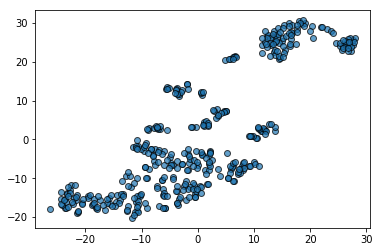

In [35]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], alpha = 0.7, edgecolors ='k')

In [36]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)>

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters =3, max_iter=100, random_state=42)

In [39]:
labels_train = kmeans.fit_predict(X_train_scaled)

количество объектов в каждом кластере

In [41]:
pd.value_counts(labels_train) 

2    191
1    127
0     86
dtype: int64

к какому кластеру относится каждый объект на тестовой выборке

In [42]:
labels_test = kmeans.fit_predict(X_test_scaled)

График t-SNE c известными лейблами

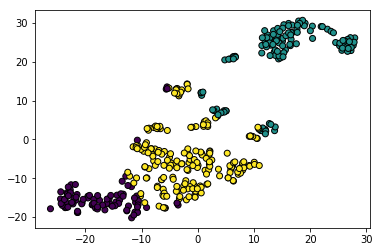

In [47]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train, edgecolors='k')
plt.text()

Среднее значение

In [49]:
y_train.mean()

22.796534653465343

In [50]:
y_train[labels_train == 0].mean()

27.78837209302326

In [51]:
y_train[labels_train == 1].mean()

16.165354330708663

In [52]:
y_train[labels_train == 2].mean()

24.958115183246072

In [55]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [56]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [57]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

(array([0.88481675, 0.07853403, 0.03664921, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

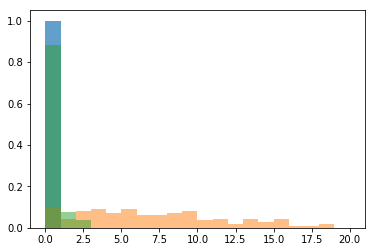

In [88]:
plt.hist(X_train.loc[labels_train==0,'CRIM'], bins=20, density=True, range={0,20}, alpha = 0.7)
plt.hist(X_train.loc[labels_train==1,'CRIM'], bins=20, density=True, range={0,20}, alpha = 0.6
        )
plt.hist(X_train.loc[labels_train==2,'CRIM'], bins=20, density=True, range={0,20}, alpha = 0.5)